In [8]:
# Common imports for problem 5 (feel free to add more)
import numpy as np
import random 

# Homework $\#1$

The goal of this homework assignment is to provide practice problems related to background in probability needed for this course and also to help you gain a better understanding of the probabilistic foundations of learning/concentration inequalities covered in the first few weeks.

## Problem 1: Badgers Enjoying Hot Chocolate

During the very cold last two weeks, Badgers flocked in large numbers to memorial union to drink hot chocolate and stay warm. A curious student worker went through the order data on the coldest day and found that n = 500 badgers ordered hot chocolate that day and the average amount dispensed per order was 12 ounces. 

(i) The student worker is curious as to how many hot chocolate super lovers are out there. Use Markov inequality (justifying why it can be used) to estimate the maximum possible number of people (out of the 500 that day) that could have ordered at least 24 ounces.

(ii) The student worker now realizes the smallest available cup size is 6 ounces, so everybody got at least that much. With this new information, reapply Markov inequality and attain a tighter bound on the maximum possible number of people (out of the 500 that day) that could have ordered at least 24 ounces.

## Solution:

i) To begin, we can use Markov inequality because the amount of hot chocolate dispensed per order is a nonnegative quantity. This is our random variable in this scenario. Using Markov inequality with $t = 24oz$ and $\mathbb{E}[X] = 12oz$, then
$$\mathbb{P}[X \geq 24] \leq \frac{\mathbb{E}[X]}{24} = \frac{1}{2}.$$
Since half of 500 is 250, a maximum of 250 badgers could have ordered at least 24oz of hot chocolate. 

ii) With the new information, recall the grading example from class where the lower bound was set to 60. We can similarly apply the 6oz lower bound to our hot chocolate problem such that 
$$\mathbb{P} [X -6 \geq 24-6] \leq \frac{12-6}{24-6} = \frac{1}{3}$$
which gives a tighter bound of 166 badgers who could've ordered at least 24oz. 

## Problem 2: The Muffin Fiasco

In light of the high demand for hot chocolates, the Union has hired a new rookie student worker for their bakery section which sells muffins. There are 10 varieties of muffins (with a vast stock for each variety, so nothing is out of stock). Since the worker is new to the job, he often makes mistakes and uniformly randomly hands out any of the 10 muffins without really looking at what variety was ordered. On his first day of job, there were 50 orders for muffins. You may assume independence between the orders.

(i) What is the probability that the fifth customer got the muffin she actually ordered?

(ii) Of the 50 orders that day, what is the expected number of people who will actually get what they ordered

(iii) What is the probability that all 50 people will get the muffin they actually ordered

(iv) Write down the estimates of the probability of everyone getting the actual muffin they ordered that you would obtain by applyng Markov inequality, Chebyshev inequality, and the Hoeffding bound. 

(v) Compare and Comment on which inequality gives you the tightest bound (i.e closest upper bound to the actual probability you calculated in part (iii))

## Solution

i) Assuming vast stock so the worker is effectively picking muffins with replacement, then the probability the fifth customer got the muffin she actually ordered is $\frac{1}{10}$ because each order is independent.

ii) The expected number of people who get what they ordered is determined by $50\mathbb{E}[X] = \frac{50}{10} = 5$ because expectation is linear. 

iii) As a result, the probability all 50 people get their muffin is $\mathbb{P}[X]^{50} = (\frac{1}{10})^{50}$ which is very small. 

iv) Let $X \sim Bernoulli(\frac{1}{10})$ and let $S_n = X_1 + X_2 + \cdots X_{50}$. Then Markov inequality gives

$$\mathbb{P}[S_n \geq 50] \leq \frac{1}{10}.$$

Chebyshev inequality is

$$\mathbb{P} [\vert S_n - 5 \vert \geq 50 - 5] \leq \frac{Var[S_n]}{45^2} = \frac{4.5}{2025} \approx 0.0022$$

since $Var[S_n] = \frac{1}{10}\frac{9}{10} = 4.5$.

Using Hoeffding bound, we see that $\hat{\mu} = \frac{S_{50}}{50}$ and $\mathbb{E}[\hat{\mu}] = \frac{1}{10}$ so then

$$\mathbb{P}[\hat{\mu} - \frac{1}{10}] \geq \frac{50}{50} = 1] \leq e^{-2*5^2} \approx 1.98*10^{-22}.$$

v) The Hoeffding bound gives the closest approximation with a substantial improvement over the Chebyshev inequality. On the otherhand, the Markov inequality wasn't even close.


## Problem 3: Sensor Measurement

A laboratory is calibrating a high-precision voltage sensor. When the sensor is connected to a zero-voltage source, the independent readings $X_1, X_2, \dots, X_n$ represent pure measurement noise. Each reading is an independent Gaussian random variable with zero mean: $X_i \sim \mathcal{N}(0, \sigma^2)$. The laboratory calculates the average noise as $\hat{X} = \frac{1}{n} \sum_{i=1}^n X_i$.

(i) Using the property that a Gaussian $X \sim \mathcal{N}(0, \sigma^2)$ is $\sigma^2$-sub-Gaussian, show that the Reported Average $\hat{X}$ is $(\sigma^2/n)$-sub-Gaussian.

(ii) Apply the Chernoff-style tail bound to find an upper bound for the probability that the average noise magnitude exceeds a threshold $\epsilon$: $\mathbb{P}(|\hat{X}| \geq \epsilon)$.

(iii) If the sensor noise variance is $\sigma^2 = 4$, find the minimum number of measurements $n$ required so that the probability of the average noise magnitude exceeding $\epsilon = 1$ is at most $\delta = 0.05$.

## Solution:

 i) Since $X_1, X_2, \cdots, X_n \sim \mathcal{N}(0, \sigma^2)$ are independent, then we can create the MGF and subsequent equalities, 
\begin{align} 
\mathbb{E}[e^{\lambda \hat{X}}] 
    &= \mathbb{E}[e^{\lambda\frac{S_n}{n}}]\\
    &= \mathbb{E}[e^{\lambda \frac{X_1}{n}}]^n\\
    &\leq (e^{\frac{\lambda^2 \sigma^2}{2n^2}})^n \text{ (since $X$ is $\sigma^2$ subgaussian) }\\
    &= e^{\frac{\lambda^2 \sigma^2}{2n}}.
\end{align}

So by definition, $\hat{X}$ is $\frac{\sigma^2}{n}$ subgaussian. Notice the definition of subgaussian uses "for all" which permits substitution of $\lambda:=\frac{\lambda}{n}$. 

ii) By a Lemma, the two-tailed chernoff bound shows $$\mathbb{P}(\vert \hat{X} \vert \geq \epsilon) \leq 2e^{\frac{-n\epsilon^2}{2\sigma^2}}.$$

since $\hat{X}$ is sub-gaussian. 

iii) First, setup the equation $\mathbb{P}[\vert \hat{X} \vert \geq 1] \leq 2e^{\frac{-n}{8}} \leq 0.05$. Then by algebra
$$n = -8\ln(\frac{0.05}{2})$$
which gives $n = 30$ as the smallest sample size. 

## Problem 4: Manufacturing Issues

A company that manufactures electrical components is planning to buy a new machine for its manufacturing process. Before committing to buy the machine, the company wants to test what fraction of the products assembled by this machine turn out to be defective. The probability of a product being defective is $\alpha$, where $\alpha$ is fixed. To determine if a product is defective, the company must break open the electrical product after which it is not usable. So the company wishes to minimize the number of products it needs to open to estimate $\alpha$ but still wishes to get a good estimate of $\alpha$. You may assume that the failures across the products are i.i.d.

1. Describe how you would try to estimate $\alpha$. Define any random variabes you'll use, how you'll use them, and show that the estimator that you choose is unbiased (that is, its expected value is same as $\alpha$).
2. Given $\epsilon = 0.05$ and $\delta = 0.05$, how many samples are needed to estimate $\alpha$ so that the probability that your estimate and $\alpha$ differ by $\epsilon$ or more is at most $\delta$? Use the tightest inequality/bound that you know and show your work.

*Hint:* Probability (or a fraction) is always bounded between 0 and 1. 

## Solution:

1. To estimate $\alpha$, define a random variable $X \sim \text{Bernoulli}(\alpha)$ since the product can either fail or not fail. Let $\hat{X}$ be the sample mean of $n\in \mathbb{N}$ samples. This estimator is unbiased because it uses the sample mean $\hat{X}$ which is unbiased over long-running experiments by definition.
2. Since $X$ is bernoulli then $X \in [0,1]$ so we can apply Hoeffding bound such that
$$\mathbb{P}[\vert \hat{X} - \mu \vert \geq 0.05] \leq 2e^{-2n0.05^2} \leq 0.05 = \delta.$$
Solving for n shows $n \geq \frac{ln(0.025)}{-2(0.05^2)} \approx 738$ suffices. From what we covered in class, Hoeffding is the tightest bound we can use here.

## Problem 5: Birthdays and Law of Large Numbers (Coding)


A classic (and surprising) fact called the birthday paradox says that if you pick n = 23 people at random, the probability that at least two share the same birthday is a little over 50% (assuming 365 equally likely days, ignoring leap years).

In this problem you will use simulation to *observe the Law of Large Numbers*: as the number of simulation trials grows, the empirical collision rate should stabilize near the true probability (about 0.507 for n=23).


### Your task (write ONE function)

Write a function `birthday_collision_rate(n, t)` that simulates the following experiment `t` times:

1. Randomly assign birthdays to `n` people, with each birthday uniformly chosen from `{0,1,2,...,364}`.
2. Record whether there is a **collision** (at least one shared birthday).
3. Return the fraction of trials that had a collision.

Your function should work for **any** positive integers `n` and `t`.

You may assume `n <= 365` for this assignment.

In [10]:
def birthday_collision_rate(n, t, seed=None):
    """
    Estimate P(at least one shared birthday among n people) via simulation.

    Parameters
    ----------
    n : int
        Number of people (assume n <= 365).
    t : int
        Number of independent simulation trials.
    seed : int or None
        Random seed for reproducibility.

    Returns
    -------
    float
        Fraction of trials (out of t) that had at least one birthday collision.
    """
    # TODO: implement
    # Hint: in one trial, generate n integers in {0,...,364}
    # and check whether any value repeats.
    if seed is not None:
        np.random.seed(seed)
    collisions = 0
    for i in range(t):
        bdays = np.random.randint(0, 365, size=n)
        if len(bdays) != len(set(bdays)): #type cast nparray bdays to set to get unique bday instances
            collisions += 1
    return collisions / t




n=23, t=       1 -> estimated collision prob = 1.000000
n=23, t=       5 -> estimated collision prob = 0.400000
n=23, t=      10 -> estimated collision prob = 0.500000
n=23, t=     100 -> estimated collision prob = 0.590000
n=23, t=   1,000 -> estimated collision prob = 0.508000
n=23, t=  10,000 -> estimated collision prob = 0.506600
n=23, t= 100,000 -> estimated collision prob = 0.506870
n=23, t=1,000,000 -> estimated collision prob = 0.507076
True collision probability (n=23) = 0.507297


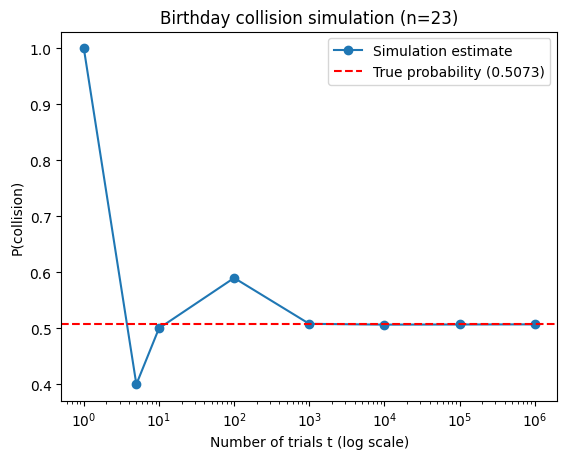

In [11]:
### RUN THIS CELL AFTER IMPLEMENTING AND RUNNING YOUR FUNCTION ABOVE ######


# After implementing your solution above, you should see the large of law numbers in action if you implemented your
# funtction correctly. As the number of trials increases, the fraction of trials with collisions stabilizes around
# the true probability

import numpy as np
import matplotlib.pyplot as plt


### NO NEED TO MAKE ANY CHANGES HERE ##########

def true_birthday_collision_prob(n, days=365):
    """
    Exact P(at least one shared birthday among n people),
    assuming independent uniform birthdays over 'days' days.
    """
    if n <= 1:
        return 0.0
    if n > days:
        return 1.0

    # P(no collision) = (days/days)*((days-1)/days)*...*((days-n+1)/days)
    p_no = 1.0
    for k in range(n):
        p_no *= (days - k) / days
    return 1.0 - p_no

### NO NEED TO MAKE ANY CHANGES HERE ##########

def run_birthday_experiment(n=23, seed=0, days=365):
    trial_counts = [1, 5, 10, 100, 1000, 10_000, 100_000, 1_000_000]
    ests = []

    for t in trial_counts:
        est = birthday_collision_rate(n, t, seed=seed)
        ests.append(est)
        print(f"n={n}, t={t:>8,} -> estimated collision prob = {est:.6f}")

    p_true = true_birthday_collision_prob(n, days=days)
    print(f"True collision probability (n={n}) = {p_true:.6f}")

    plt.figure()
    plt.plot(trial_counts, ests, marker='o', label="Simulation estimate")
    plt.axhline(p_true, linestyle='--', color="red",label=f"True probability ({p_true:.4f})")
    plt.xscale('log')
    plt.xlabel("Number of trials t (log scale)")
    plt.ylabel("P(collision)")
    plt.title(f"Birthday collision simulation (n={n})")
    plt.legend()
    plt.show()


# Example usage (Start with n=23 and feel free to mess around with the value of n and the seed)
run_birthday_experiment(n=23, seed=42)
